<a href="https://colab.research.google.com/github/singhadi01/Sales-Analysis-Using-Python/blob/main/SalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
data=pd.read_csv("/content/drive/MyDrive/Datasets /Diwali Sales Data.csv", encoding='ISO-8859-1')

In [120]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [121]:
data.shape

(11251, 15)

In [122]:
data.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [124]:
data.drop(['Status','unnamed1'],axis=1,inplace=True) #Dropped Status and unnamed1 column because there is no values in these columns

In [125]:
data.shape

(11251, 13)

In [126]:
pd.isnull(data).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [127]:
#Row with null values of Amount column is approx 0.1% of whole data so dropping it will not cause any effect on the data

In [128]:
data.dropna(inplace=True)

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [130]:
data['Amount']=data['Amount'].astype('int')

In [131]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [132]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


**Now data cleaning is completed and after this data analysis will be performed**

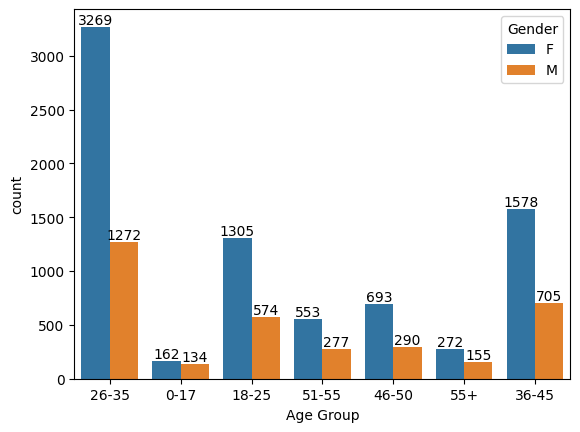

In [133]:
js=sns.countplot(data=data,x='Age Group',hue='Gender')
for bars in js.containers:
  js.bar_label(bars)

In [134]:
sales_by_age=data.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_by_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


In [135]:
Gender_count=data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
Gender_count

,Gender,Amount
0,F,74335853
1,M,31913276


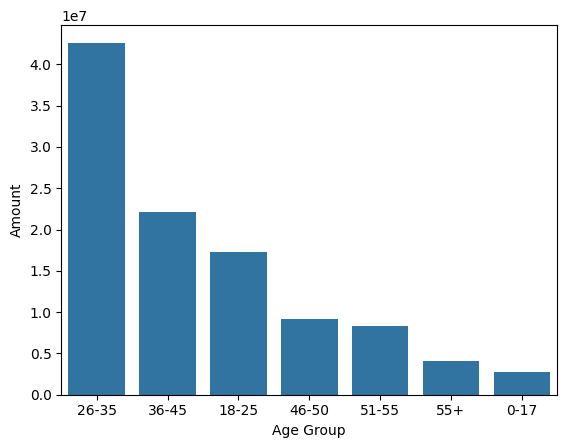

In [136]:
sns.barplot(x='Age Group',y='Amount',data=sales_by_age)
plt.show()

from above graphs we observe that most of the buyers are of age between 26-35 yrs female  

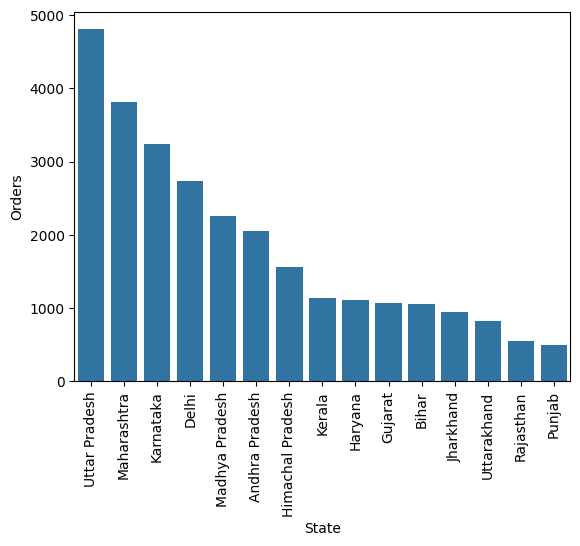

In [137]:
state_sales=data.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(15)
sns.barplot(data=state_sales,x='State',y='Orders')
plt.xticks(rotation='vertical')
plt.show()

from the above graph we can see that most of the orders are from Uttar Pradesh , Maharashtra and Karnataka

In [138]:
marital_counts = data.groupby('Marital_Status').size().reset_index(name='Count')
print(marital_counts)

   Marital_Status  Count
0               0   6518
1               1   4721


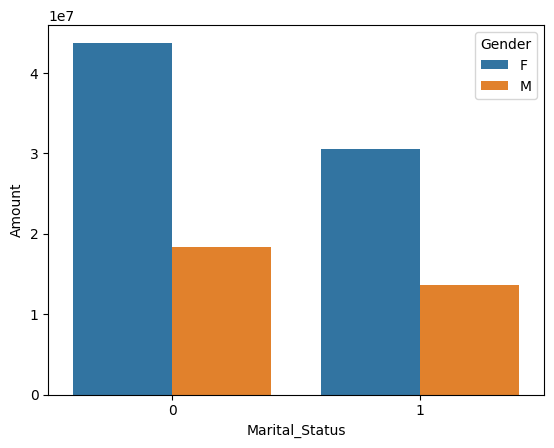

In [139]:
marital_sales=data.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data=marital_sales,x='Marital_Status',y='Amount',hue='Gender')
plt.show()

Unmarried Women Spends more amount on shopping.

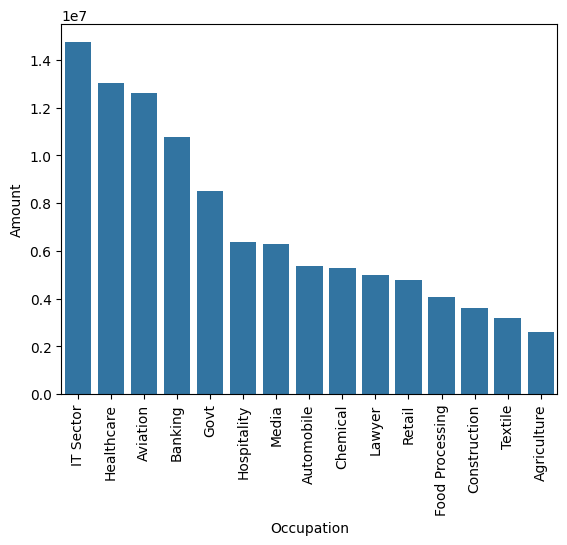

In [140]:
Occupation_count=data.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data=Occupation_count,x='Occupation',y='Amount')
plt.xticks(rotation='vertical')
plt.show()

Most of the buyers are from IT sector Healthcare and Aviation


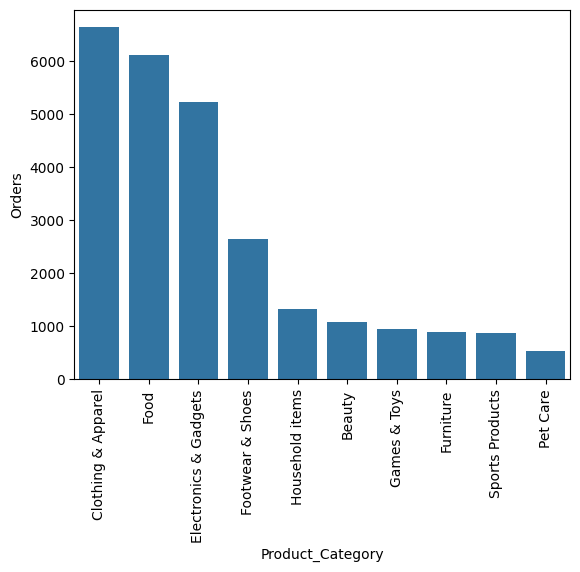

In [141]:
Product_count=data.groupby(["Product_Category"],as_index=False)['Orders'].sum().sort_values(by="Orders",ascending=False).head(10)
sns.barplot(data=Product_count,x='Product_Category',y='Orders')
plt.xticks(rotation='vertical')
plt.show()

In [142]:
Product_order=data.groupby(['Product_Category']).size().reset_index(name='Orders').sort_values(by='Orders',ascending=False).head(10)
Product_order

,Product_Category,Orders
3,Clothing & Apparel,2655
6,Food,2490
5,Electronics & Gadgets,2087
7,Footwear & Shoes,1059
11,Household items,520
1,Beauty,422
9,Games & Toys,386
14,Sports Products,356
8,Furniture,352
13,Pet Care,212


Most of the sold products are from Clothing & Apparel , Food and Electronics & Gadgets

**Conclusion**

# *The analysis reveals that the majority of buyers are women aged 26-35, with unmarried women spending more on shopping. The highest number of orders come from Uttar Pradesh, Maharashtra, and Karnataka, making them key markets. Buyers are primarily from the IT, Healthcare, and Aviation sectors, indicating strong purchasing power. The most popular product categories are Clothing & Apparel, Food, and Electronics & Gadgets. These insights suggest that businesses should focus on targeted marketing strategies, personalized promotions, and region-specific offers to maximize sales and customer engagement.*